<a href="https://colab.research.google.com/github/MANOJPATRA1991/Tensorflow-learn/blob/master/Beginner/1.%20ML%20basics%20with%20Keras/2.%20Text%20classification%20with%20TF%20Hub/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [0]:
# Define class names for labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
# Each label is an integer in the range of 0 to 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

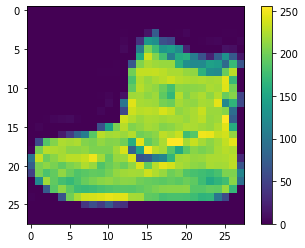

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# Scale the images in the range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

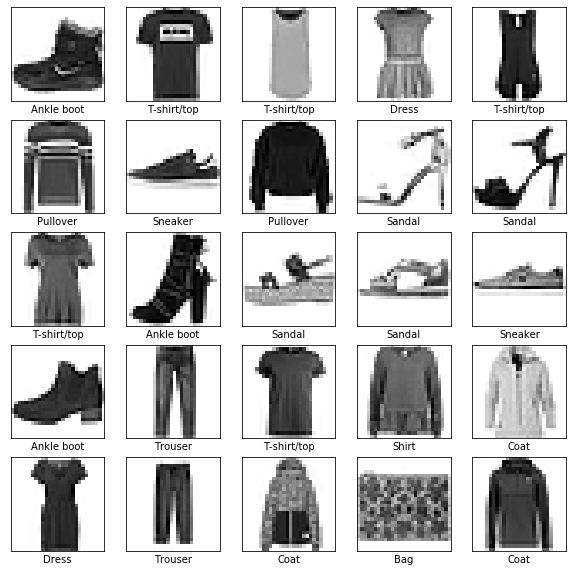

In [17]:
plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [0]:
# Build the model
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)), # no learning, only reformats the data
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

In [0]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [20]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.4998 - accuracy: 0.8237
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3788 - accuracy: 0.8630
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3368 - accuracy: 0.8771
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3146 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2957 - accuracy: 0.8920
Epoch 6/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2797 - accuracy: 0.8967
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2685 - accuracy: 0.8998
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2571 - accuracy: 0.9052
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2475 - accuracy: 0.9075
Epoch 10/10
6

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 0s - loss: 0.2321 - accuracy: 0.8833


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

In [0]:
# Make prediction
predictions = model.predict(test_images)

In [43]:
predictions.shape

(10000, 10)

In [23]:
predictions[0]

array([5.8087126e-06, 1.6875047e-10, 1.1020392e-05, 1.1442369e-07,
       4.9735866e-07, 6.2119882e-03, 2.7837330e-06, 2.6108921e-02,
       2.5454541e-05, 9.6763337e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

In [0]:
def plot_image(predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(
      class_names[predicted_label],
      100*np.max(predictions_array),
      class_names[true_label]
  ), color=color)

In [0]:
def plot_value_array(predictions_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")

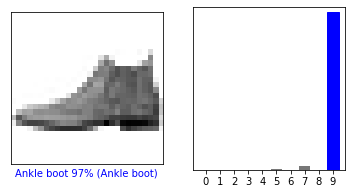

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(predictions[i], test_labels[i], test_images[i])
plt.subplot(1, 2, 2)
plot_value_array(predictions[i], test_labels[i])

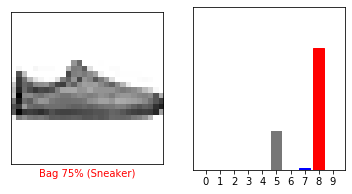

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(predictions[i], test_labels[i], test_images[i])
plt.subplot(1, 2, 2)
plot_value_array(predictions[i], test_labels[i])

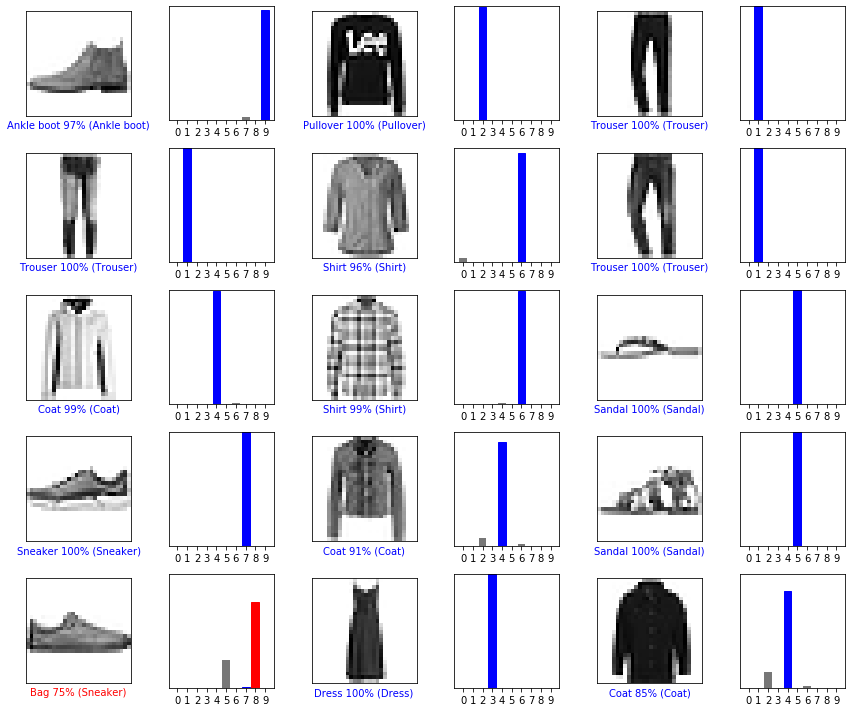

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(predictions[i], test_labels[i], test_images[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(predictions[i], test_labels[i])
plt.tight_layout()
plt.show()

In [38]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [39]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [40]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.6211546e-05 6.7806085e-14 9.9912304e-01 2.9912232e-11 6.8350823e-04
  8.0881985e-12 1.3723339e-04 2.5971117e-21 9.1067591e-11 7.6703922e-17]]


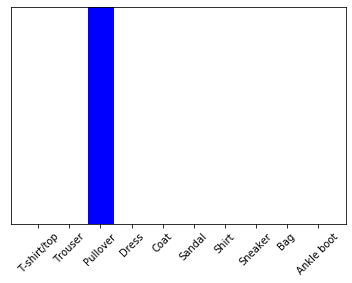

In [46]:
plot_value_array(predictions_single[0], test_labels[1])
_ = plt.xticks(range(10), class_names, rotation=45)

In [44]:
np.argmax(predictions_single[0])

2